In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train_data=pd.read_csv('diss.csv')

In [4]:
train_data.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,19-04-2019 05:37,PONFERRADA,MADRID,02-06-2019 15:00,02-06-2019 19:42,MD-AVE,59.50,Turista con enlace,Flexible
1,703,19-04-2019 05:37,PONFERRADA,MADRID,02-06-2019 17:15,02-06-2019 23:03,MD-AVE,34.65,Turista con enlace,Promo +
2,704,19-04-2019 05:37,PONFERRADA,MADRID,02-06-2019 17:15,02-06-2019 23:10,MD-LD,39.95,Turista con enlace,Promo +
3,705,19-04-2019 05:37,PONFERRADA,MADRID,02-06-2019 17:15,02-06-2019 22:14,MD-AVE,40.60,Turista con enlace,Promo +
4,706,19-04-2019 05:37,PONFERRADA,MADRID,02-06-2019 18:55,02-06-2019 23:03,ALVIA,27.90,Turista,Promo


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215909 entries, 0 to 215908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215909 non-null  int64  
 1   insert_date  215909 non-null  object 
 2   origin       215909 non-null  object 
 3   destination  215909 non-null  object 
 4   start_date   215909 non-null  object 
 5   end_date     215909 non-null  object 
 6   train_type   215909 non-null  object 
 7   price        202321 non-null  float64
 8   train_class  215266 non-null  object 
 9   fare         215266 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 16.5+ MB


In [6]:
train_data.describe()

,Unnamed: 0,price
count,2.159090e+05,202321.000000
mean,1.303185e+06,56.723877
std,6.071288e+05,25.531787
min,7.020000e+02,16.600000
25%,9.026100e+05,28.350000
50%,1.427927e+06,53.400000
75%,1.575116e+06,76.300000
max,2.579721e+06,206.800000


In [7]:
train_data.shape

(215909, 10)

# Data Cleaning

In [8]:
train_data.isnull().sum()

Unnamed: 0         0
insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
train_data['insert_date'] = pd.to_datetime(train_data['insert_date'])
train_data['start_date'] = pd.to_datetime(train_data['start_date'])
train_data['end_date'] = pd.to_datetime(train_data['end_date'])

In [12]:
# Calculate the first quartile (Q1) and third quartile (Q3) of the 'price' column
Q1 = train_data['price'].quantile(0.25)
Q3 = train_data['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [13]:
# Calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'price' column
outliers = train_data[(train_data['price'] < lower_bound) | (train_data['price'] > upper_bound)]

# Print the outliers
outliers.shape

(66, 9)

In [14]:
train_data = train_data.drop(outliers.index)

# EDA

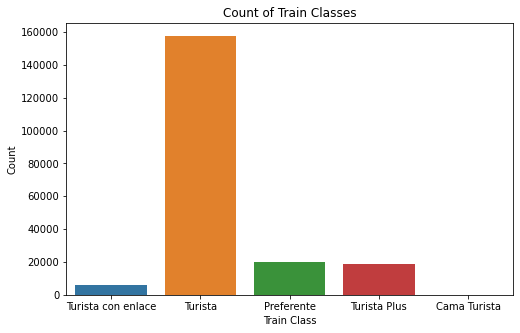

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='train_class')
plt.title('Count of Train Classes')
plt.xlabel('Train Class')
plt.ylabel('Count')
plt.show()

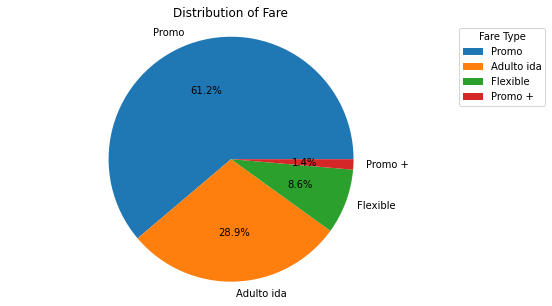

In [16]:
plt.figure(figsize=(8, 5))
fare_counts = train_data['fare'].value_counts()
plt.pie(fare_counts, labels=fare_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Fare')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Place legend outside the pie chart
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=fare_counts.index, title='Fare Type')
plt.show()

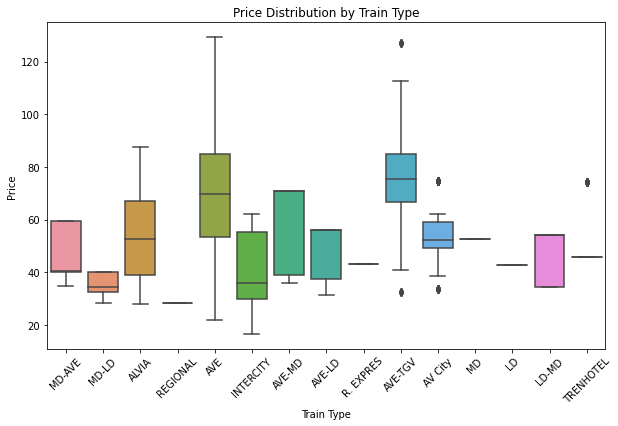

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='train_type', y='price')
plt.title('Price Distribution by Train Type')
plt.xlabel('Train Type')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

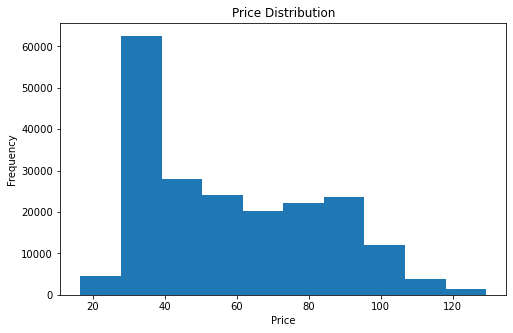

In [18]:
plt.figure(figsize=(8,5))
plt.hist(train_data['price'], bins=10)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
train_data.set_index('insert_date', inplace=True)

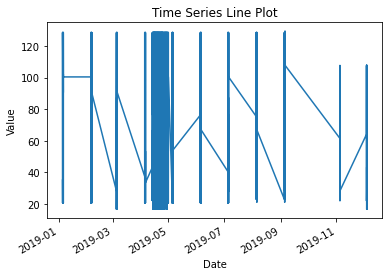

In [20]:
# Plot the time series data
train_data['price'].plot()
# Set plot title and labels
plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [21]:
train_data.reset_index(inplace=True)

In [22]:
train_data.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:00,PONFERRADA,MADRID,2019-02-06 15:00:00,2019-02-06 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:00,PONFERRADA,MADRID,2019-02-06 17:15:00,2019-02-06 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:00,PONFERRADA,MADRID,2019-02-06 17:15:00,2019-02-06 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:00,PONFERRADA,MADRID,2019-02-06 17:15:00,2019-02-06 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:00,PONFERRADA,MADRID,2019-02-06 18:55:00,2019-02-06 23:03:00,ALVIA,27.90,Turista,Promo


# Split the data into training and test

In [23]:
# Label encode categorical columns
categorical_columns = ['origin', 'destination', 'train_type', 'train_class', 'fare']
le = LabelEncoder()
for column in categorical_columns:
    train_data[column] = le.fit_transform(train_data[column])

In [24]:
# Split the train_data into features and target variable
X = train_data.drop(['price','insert_date','start_date','end_date'], axis=1)
y = train_data['price']

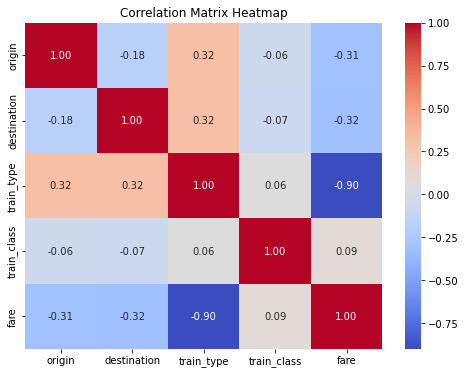

In [25]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
# Split the train_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [27]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

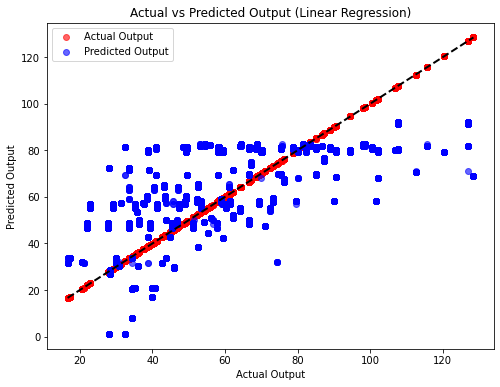

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the output on the test set
y_pred_lr = model.predict(X_test)

# Create a scatter plot for actual vs predicted output
plt.figure(figsize=(8, 6))

# Scatter plot for actual output (y_test) with red color
plt.scatter(y_test, y_test, c='red', alpha=0.6, label='Actual Output')

# Scatter plot for predicted output (y_pred_lr) with blue color
plt.scatter(y_test, y_pred_lr, c='blue', alpha=0.6, label='Predicted Output')

# Diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Actual vs Predicted Output (Linear Regression)")
plt.legend()
plt.show()


In [29]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [30]:
mse_lr

167.40453311329023

In [31]:
r2_lr

0.7420632741482434

# Random Forest

In [32]:
# Fit the model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
# Make predictions
y_pred_rf = model_rf.predict(X_test)

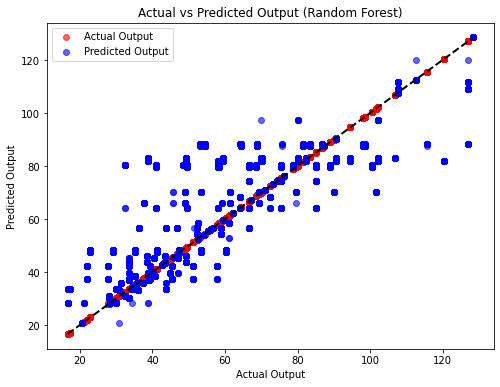

In [33]:
# Create a scatter plot to visualize the actual output vs predicted output
plt.figure(figsize=(8, 6))

# Scatter plot for actual output (y_test) with red color
plt.scatter(y_test, y_test, c='red', alpha=0.6, label='Actual Output')

# Scatter plot for predicted output (y_pred_lr) with blue color
plt.scatter(y_test, y_pred_rf, c='blue', alpha=0.6, label='Predicted Output')

# Diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Actual vs Predicted Output (Random Forest)")
plt.legend()
plt.show()

In [34]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [35]:
mse_rf

84.20718172140998

In [36]:
r2_rf

0.8702536643274446

# Gradient Boosting

In [37]:
# Fit the model
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)
# Make predictions
y_pred_gb = model_gb.predict(X_test)

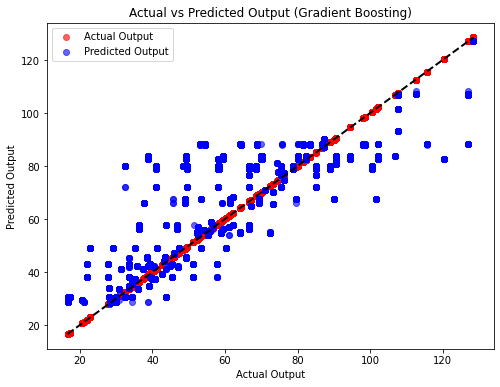

In [38]:
# Create a scatter plot to visualize the actual output vs predicted output
plt.figure(figsize=(8, 6))

# Scatter plot for actual output (y_test) with red color
plt.scatter(y_test, y_test, c='red', alpha=0.6, label='Actual Output')

# Scatter plot for predicted output (y_pred_lr) with blue color
plt.scatter(y_test, y_pred_gb, c='blue', alpha=0.6, label='Predicted Output')

# Diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Actual vs Predicted Output (Gradient Boosting)")
plt.legend()
plt.show()

In [39]:
# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [40]:
mse_gb

87.11045199150028

In [41]:
r2_gb

0.8657803085956554

# DecisionTreeRegressor

In [42]:
# Fit the model
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)
# Make predictions
y_pred_dtr = model_dtr.predict(X_test)

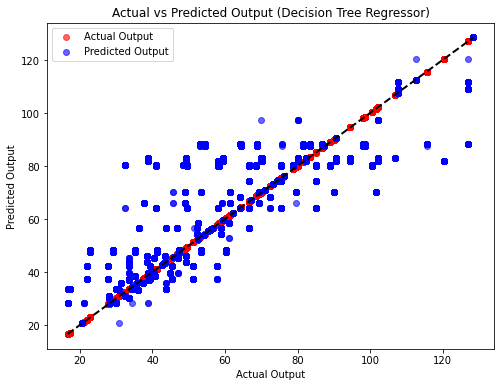

In [43]:
# Create a scatter plot to visualize the actual output vs predicted output
plt.figure(figsize=(8, 6))

# Scatter plot for actual output (y_test) with red color
plt.scatter(y_test, y_test, c='red', alpha=0.6, label='Actual Output')

# Scatter plot for predicted output (y_pred_lr) with blue color
plt.scatter(y_test, y_pred_dtr, c='blue', alpha=0.6, label='Predicted Output')

# Diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Actual vs Predicted Output (Decision Tree Regressor)")
plt.legend()
plt.show()

In [44]:
# Evaluate the model
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

In [45]:
mse_dtr

84.21004961441918

In [46]:
r2_dtr

0.8702492454809586

# K-Nearest Neighbors

In [47]:
# Fit the model
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
# Make predictions
y_pred_knn = model_knn.predict(X_test)

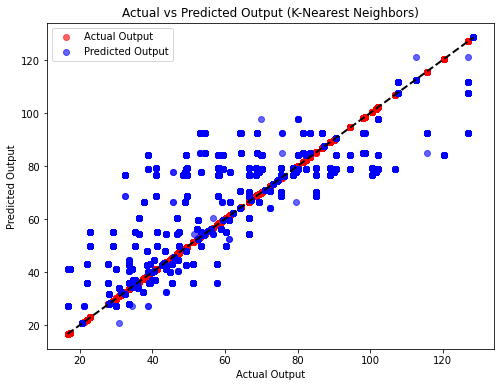

In [48]:
# Create a scatter plot to visualize the actual output vs predicted output
plt.figure(figsize=(8, 6))

# Scatter plot for actual output (y_test) with red color
plt.scatter(y_test, y_test, c='red', alpha=0.6, label='Actual Output')

# Scatter plot for predicted output (y_pred_lr) with blue color
plt.scatter(y_test, y_pred_knn, c='blue', alpha=0.6, label='Predicted Output')

# Diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Actual vs Predicted Output (K-Nearest Neighbors)")
plt.legend()
plt.show()

In [49]:
# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [50]:
mse_knn

92.0847561051341

In [51]:
r2_knn

0.8581159061293653

In [52]:
mse_data = [ ['KNN', mse_knn],['Random Forest Classifier',mse_rf],
       ['Gradient Boosting Classifier',mse_gb],['Linear Regression', mse_lr], ['Decision Tree Regressor', mse_dtr] ]
mse_df = pd.DataFrame(mse_data, columns=['Classifiers Name', 'MSE'])

In [53]:
mse_df

,Classifiers Name,MSE
0,KNN,92.084756
1,Random Forest Classifier,84.207182
2,Gradient Boosting Classifier,87.110452
3,Linear Regression,167.404533
4,Decision Tree Regressor,84.210050


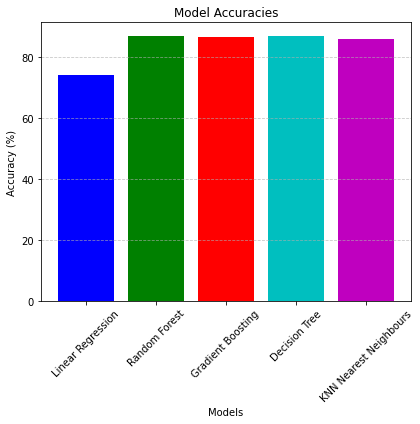

In [54]:
import matplotlib.pyplot as plt

# Example data: hyperparameters and accuracy values
hyperparameters = ["Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree", "KNN Nearest Neighbours"]
accuracy_values = [r2_lr * 100, mse_rf * 100, mse_gb * 100, mse_dtr * 100, r2_knn * 100]  # Replace with your actual accuracy values

# Create a bar plot of accuracies against hyperparameters
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
colors = ['b', 'g', 'r', 'c', 'm']  # Different colors for each bar

plt.bar(hyperparameters, accuracy_values, color=colors)

plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.tight_layout()  # Adjust layout for better appearance
plt.show()
